# Using a Neural Networkt recognize execution patterns using hardware performance counters

Load libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.utils import to_categorical
import seaborn as sns
dataset = pd.read_csv('data.csv',sep=';')

Using TensorFlow backend.


Shuffle data, necessary to mix the rows in the dataset in order to have training and testing data with all the cases.
If the data is not shuffled, the cur for the test7train pair will be done at exacty the x-th position in the dataset.

In [2]:
from sklearn.utils import shuffle
dataset = shuffle(dataset)

Creating the dataset which will be used in the training step.
Two sizes are removed in order to test if unseen data can be used to identify the patterns.

In [3]:
dataset_train = dataset[dataset['size_vector'] != 90000000]
dataset_train = dataset_train[dataset_train['size_vector'] != 1000000]
sorted(dataset_train.size_vector.unique())


[1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 100000,
 200000,
 300000,
 400000,
 500000,
 600000,
 700000,
 800000,
 900000,
 2000000,
 3000000,
 4000000,
 5000000,
 6000000,
 7000000,
 8000000,
 9000000,
 10000000,
 20000000,
 30000000,
 40000000,
 50000000,
 60000000,
 70000000,
 80000000,
 100000000,
 110000000,
 120000000,
 130000000,
 140000000,
 150000000,
 160000000,
 170000000,
 180000000,
 190000000,
 200000000]

Generate the dataset with the two sizes to predict

In [4]:
dataset_pred = dataset[dataset['size_vector'] == 90000000]
dataset_pred = dataset_pred.append(dataset[dataset['size_vector'] == 1000000])

sorted(dataset_pred.size_vector.unique())

[1000000, 90000000]

Remove extra columns and hardware performance counters discarded with PCA

In [5]:
def erase_from_dataset(dataset_in):
    del dataset_in['id']
    del dataset_in['size_vector']
    del dataset_in['comp_opt']
    del dataset_in['PAPI_BR_INS']
    del dataset_in['PAPI_BR_NTK']
    del dataset_in['PAPI_BR_PRC']
    del dataset_in['PAPI_FP_INS']
    del dataset_in['PAPI_L2_DCA']
    del dataset_in['PAPI_L2_DCM']
    del dataset_in['PAPI_L2_DCR']
    del dataset_in['PAPI_L2_DCW']
    del dataset_in['PAPI_L3_DCA']
    del dataset_in['PAPI_L3_DCR']
    del dataset_in['PAPI_L3_DCW']
    del dataset_in['PAPI_L3_LDM']
    del dataset_in['PAPI_LST_INS']
    del dataset_in['PAPI_RES_STL']
    del dataset_in['PAPI_TOT_CYC']
    del dataset_in['PAPI_L1_ICA']
    del dataset_in['PAPI_L1_ICH']
    del dataset_in['PAPI_L1_ICM']
    del dataset_in['PAPI_L1_ICR']
    del dataset_in['PAPI_L1_TCM']
    del dataset_in['PAPI_L2_ICA']
    del dataset_in['PAPI_L2_ICH']
    del dataset_in['PAPI_L2_ICM']
    del dataset_in['PAPI_L2_ICR']
    del dataset_in['PAPI_L2_TCA']
    del dataset_in['PAPI_L2_TCH']
    del dataset_in['PAPI_L2_TCM']
    del dataset_in['PAPI_L2_TCR']
    del dataset_in['PAPI_L2_TCW']
    del dataset_in['PAPI_L3_ICA']
    del dataset_in['PAPI_L3_ICR']
    del dataset_in['PAPI_L3_TCA']
    del dataset_in['PAPI_L3_TCR']
    del dataset_in['PAPI_L3_TCW']
    del dataset_in['PAPI_TLB_IM']
    del dataset_in['PAPI_TLB_TL']
    del dataset_in['PAPI_TOT_IIS']

    dataset_in = dataset_in.reset_index(drop=True)
    
erase_from_dataset(dataset_train)
erase_from_dataset(dataset_pred)

Divide dataset hardware performance counters and labels

In [6]:
X = dataset_train.iloc[:,1:21].values
y = dataset_train.iloc[:,0].values

Normalize data

In [7]:
from sklearn.preprocessing import Normalizer
scaler_x = Normalizer()
scaler_x.fit(X)
X_scaled =  scaler_x.transform(X)

Encode labels in numeric categories

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

Load keras NN libraries and create empty NN

In [9]:
#Defining the model 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


model = Sequential()

Add input layer for the 20 hardware counters
Add one hidden layer
And one output layer
Then compile the model

In [10]:
model.add(Dense(10,input_shape=(20,),activation='tanh'))
model.add(Dense(4,activation='softmax'))
model.compile(Adam(lr=0.001),'categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________


Execute the neural network

In [11]:
history = model.fit(X_scaled,Y,batch_size=100,epochs=10,shuffle=1,validation_split=0.20)

Train on 345600 samples, validate on 86400 samples
Epoch 1/10
345600/345600 [==============================] - 4s 10us/step - loss: 1.0538 - acc: 0.5603 - val_loss: 0.7534 - val_acc: 0.6221
Epoch 2/10
345600/345600 [==============================] - 3s 10us/step - loss: 0.5996 - acc: 0.8006 - val_loss: 0.4777 - val_acc: 0.8306
Epoch 3/10
345600/345600 [==============================] - 3s 10us/step - loss: 0.3979 - acc: 0.8884 - val_loss: 0.3344 - val_acc: 0.9138
Epoch 4/10
345600/345600 [==============================] - 3s 10us/step - loss: 0.2938 - acc: 0.9338 - val_loss: 0.2596 - val_acc: 0.9420
Epoch 5/10
345600/345600 [==============================] - 3s 10us/step - loss: 0.2329 - acc: 0.9520 - val_loss: 0.2093 - val_acc: 0.9497
Epoch 6/10
345600/345600 [==============================] - 3s 10us/step - loss: 0.1893 - acc: 0.9581 - val_loss: 0.1735 - val_acc: 0.9560
Epoch 7/10
345600/345600 [==============================] - 3s 10us/step - loss: 0.1571 - acc: 0.9612 - val_loss: 0

See the evolution of the model

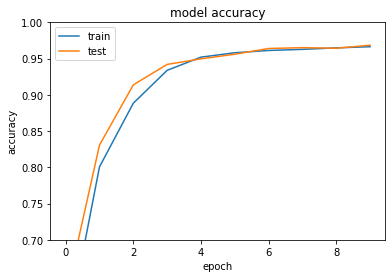

In [12]:
plt.ylim(0.7,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Divide dataset hardware performance counters and labels

In [13]:
X_pred = dataset_pred.iloc[:,1:21].values
y_pred = dataset_pred.iloc[:,0].values

Normalize the data

In [14]:
X_pred_scaled = scaler_x.fit_transform(X_pred)

Use the network to predict the labels and transform the output to the pattern's labels

In [15]:
predictions = model.predict_classes(X_pred_scaled)
prediction_ = np.argmax(to_categorical(predictions), axis = 1)
prediction_ = encoder.inverse_transform(prediction_)

Check the % of correct and incorrect predictions

In [16]:
pred_correct=0
pred_incorrect=0
for i, j in zip(prediction_ , y_pred):
    if (i==j):
        pred_correct = pred_correct+1
    else:
        pred_incorrect = pred_incorrect+1
    #print( " the nn predict {}, and the pattern to find is {}. Success? {}".format(i,j,i==j))
    
print("Correct predictions= {} ({}%)".format(pred_correct,pred_correct*100/(pred_correct+pred_incorrect)))
print("Incorrect predictions= {} ({}%)".format(pred_incorrect,pred_incorrect*100/(pred_correct+pred_incorrect)))

Correct predictions= 16000 (100.0%)
Incorrect predictions= 0 (0.0%)
